In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = iris.data
y = iris.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [8]:
# for plotting
df['species'] = df['target'].apply(lambda i: iris.target_names[i])


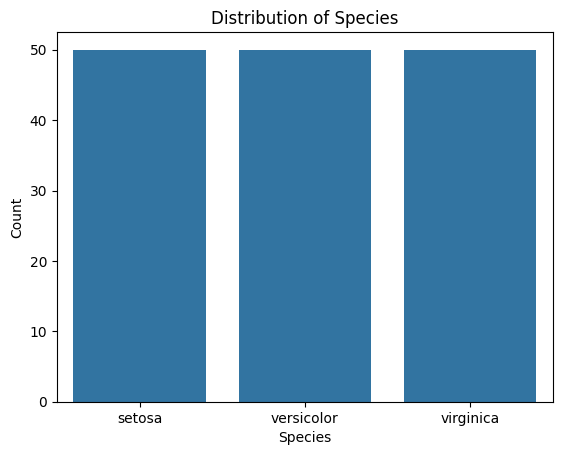

In [9]:
sns.countplot(x='species', data=df)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

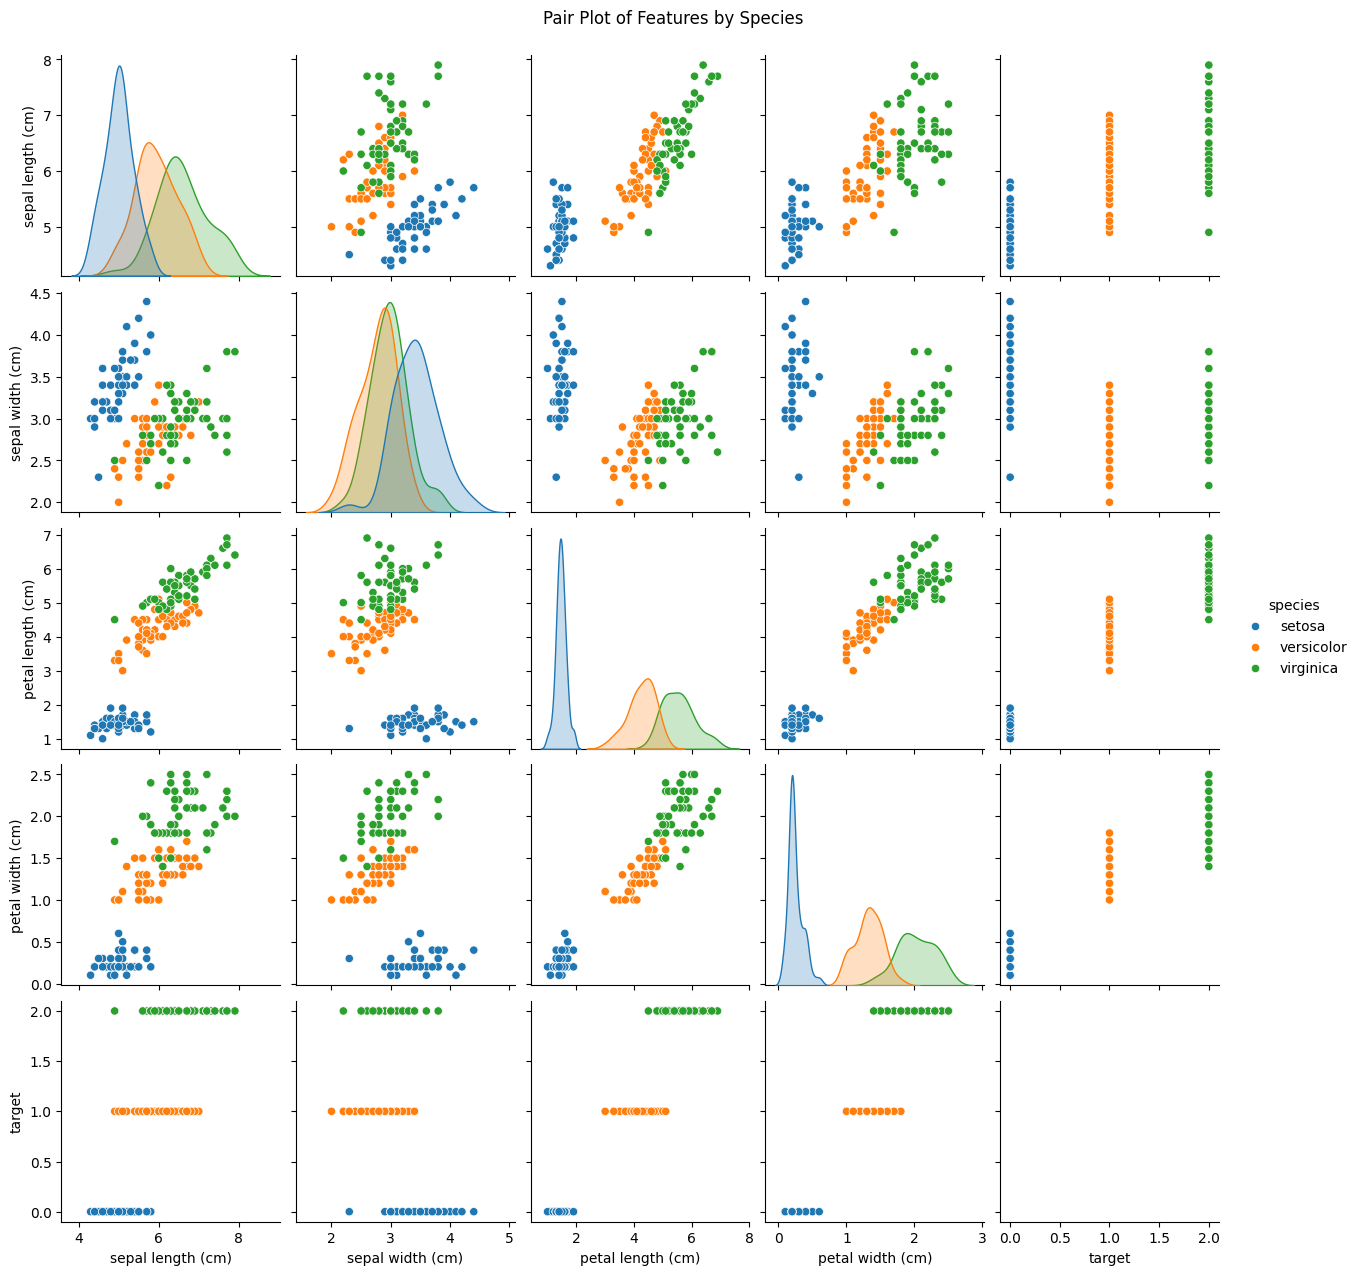

In [11]:
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Features by Species', y=1.02)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (120, 4)
Shape of X_test_scaled: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
#Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialzation
dt = DecisionTreeClassifier(random_state=42)

#cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation accuracy: 0.95

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



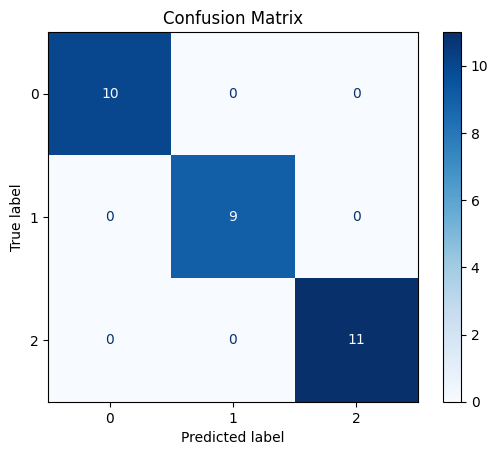

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=best_dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred = best_dt_model.predict(X_test_scaled)

print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])

Predictions: [1 0 2 1 1]
True labels: 73     1
18     0
118    2
78     1
76     1
Name: target, dtype: int64


Feature Importances:
             feature  importance
2  petal length (cm)    0.907204
3   petal width (cm)    0.092796
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


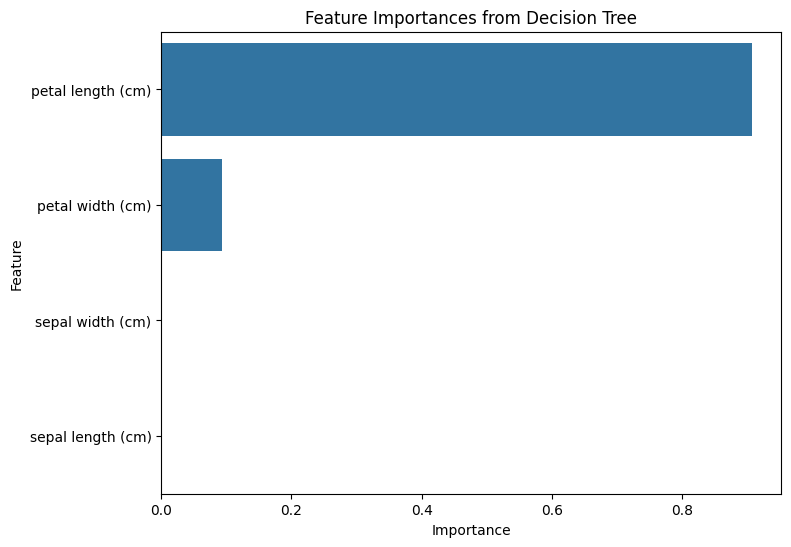

In [20]:
# feature importances from the best Decision Tree model
feature_imp = best_dt_model.feature_importances_
feature_names = X.columns

# DataFrame to display
feature_imp_df = pd.DataFrame({'feature': feature_names, 'importance': feature_imp})
feature_imp_df = feature_imp_df.sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_imp_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_imp_df)
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

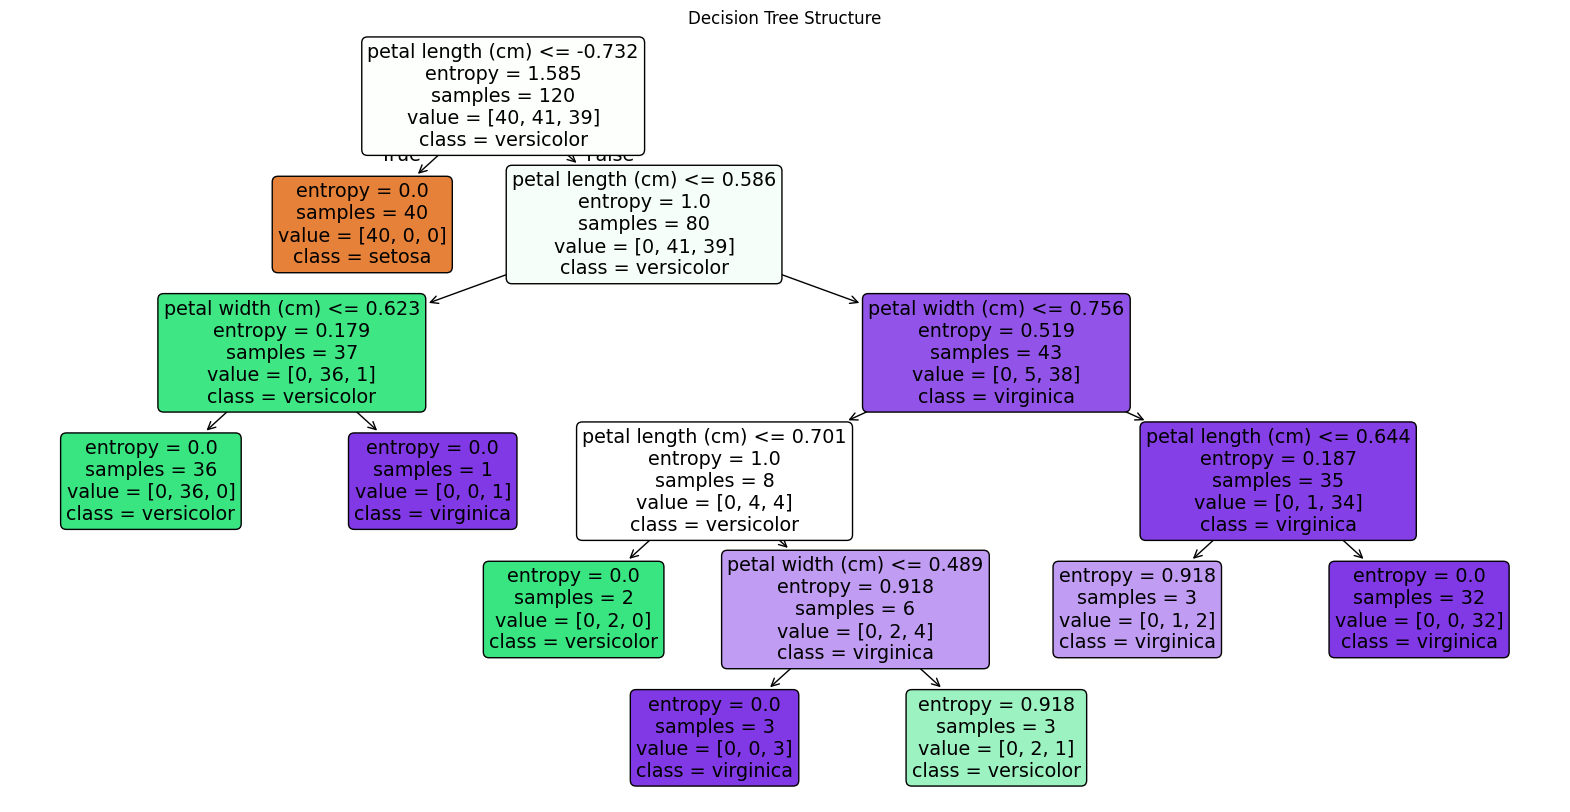

In [25]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

In [23]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn)
print("\nKNN Model Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 1.0

KNN Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Project Summary: Iris Flower Classifier

In this project I built two machine learning models (Decision Tree and KNN) to classify iris flowers into three species: Setosa, Versicolor and Virginica. I used the popular Iris dataset which contains measurements of petal and sepal lengths and widths.

---

###  Methods:

- Loaded the dataset using `scikit-learn`
- Explored the data using plots and statistics
- Split it into training (80%) and test (20%) sets
- Trained a **Decision Tree model** with hyperparameter tuning (GridSearchCV)
- Trained a **K-Nearest Neighbors (KNN)** model
- Evaluated both models using accuracy, confusion matrix and classification report
- Visualized the decision tree and feature importance

---

### Results:

- **Best parameters for Decision Tree**:
  - Criterion: `'entropy'`
  - `min_samples_split`: 5
  - Accuracy (on test data): **100%**
  
- **Confusion Matrix**: all predictions were correct

- **Classification Report**:  
  Every class had perfect scores — precision, recall and F1-score were all **1.00**

- **Feature Importance**:
  - Petal length and petal width were the most important features

---

### 🔁 Comparison with KNN:

I also tried KNN (with `n_neighbors=5`) and got the same result: **100% accuracy** on the test data. That means both models performed equally well.

---


### Conclusion:

Both models worked perfectly on this dataset. This was a great introduction to supervised learning and I now feel confident about the ML process  from loading data to training, tuning and evaluating a model.
